In [5]:
import numpy as np
import peakutils
from change_point_detector.density_ratio_estimator import DRChangeRateEstimator
import matplotlib.pyplot as plt
%matplotlib inline

## Build change rate estimator

In [6]:
detector = DRChangeRateEstimator(sliding_window=3,
                                                               pside_len=50,
                                                               cside_len=50,
                                                               mergin=-1,
                                                               trow_offset=0,
                                                               tcol_offset=0)
detector.build(estimation_method="RuLSIFitting",
                          options=detector.RuLSIF_OPTION)

## Import test data

In [31]:
from change_point_detector.test_dataset import TestDataSet

dataset = TestDataSet()
# load data
widths=[100, 100, 100, 100, 100]
# gradients=[1., 3., -2.]
means=[10.0, 10.0, 10.0, 10.0, 10.0]
variances=[0.5, 2.5, 0.5, 2.5, 0.5]
data_y = dataset.get_step_series(widths, means, variances)
data_x = np.arange(sum(widths), dtype=float)
data = {"x": data_x, "y": data_y}

## Trasform time series into change rate

In [32]:
#  calculate change rate
change_rates = detector.transform(data["y"], destination="forward_backward")
change_rates = np.nan_to_num(change_rates)

# peak search
peak_indexes = peakutils.indexes(change_rates, thres=0.1, min_dist=50)

## Draw original time series and change rate

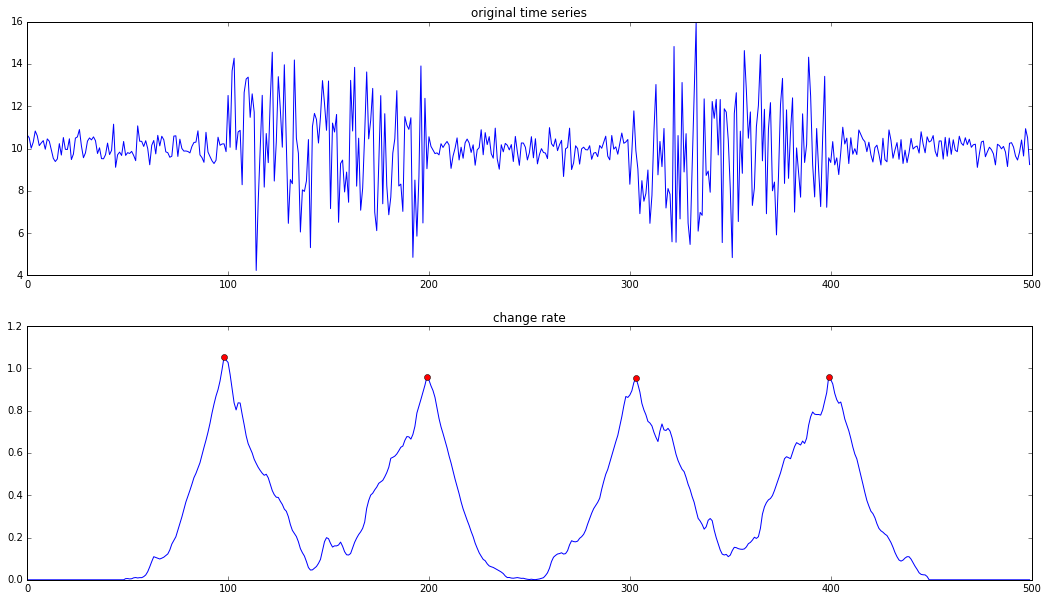

In [35]:
figs = plt.figure(figsize=(18, 10))
subfig1 = figs.add_subplot(2, 1, 1)
subfig1.plot(data["x"], data["y"])
subfig1.set_title("original time series")
subfig2 = figs.add_subplot(2, 1, 2)
subfig2.plot(data["x"], change_rates)
subfig2.plot(data["x"][peak_indexes], change_rates[peak_indexes],  "o",  color="red")
subfig2.set_title("change rate")